# Lab 1 Analysis Example using Thicket

In [1]:
import sys
sys.path.append("/scratch/group/csce435-f23/python-3.8.17/lib/python3.8/site-packages")
sys.path.append("/scratch/group/csce435-f23/thicket")
from glob import glob

import matplotlib.pyplot as plt
import pandas as pd

import thicket as th

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

What are the files we are analyzing?

In [3]:
all_files = glob("cali_s2/*.cali")
print(all_files)

['cali_s2/s2-p65536-a64.cali', 'cali_s2/s2-p262144-a128.cali', 'cali_s2/s2-p65536-a32.cali', 'cali_s2/s2-p262144-a32.cali', 'cali_s2/s2-p65536-a128.cali', 'cali_s2/s2-p262144-a64.cali']


# Read n files (n = 33)

In [4]:
tk = th.Thicket.from_caliperreader(all_files)

What files?

In [5]:
tk.profile_mapping

OrderedDict([(468711370, 'cali_s2/s2-p65536-a128.cali'),
             (839839695, 'cali_s2/s2-p65536-a32.cali'),
             (1535899484, 'cali_s2/s2-p65536-a64.cali'),
             (1668203353, 'cali_s2/s2-p262144-a128.cali'),
             (1835006261, 'cali_s2/s2-p262144-a32.cali'),
             (2002307779, 'cali_s2/s2-p262144-a64.cali')])

Call tree

In [6]:
tk.statsframe.dataframe["test"] = -1
print(tk.tree(metric_column="test"))

  _____ _     _      _        _   
 |_   _| |__ (_) ___| | _____| |_ 
   | | | '_ \| |/ __| |/ / _ \ __|
   | | | | | | | (__|   <  __/ |_ 
   |_| |_| |_|_|\___|_|\_\___|\__|  v2023.3.0

-1.000 main
├─ -1.000 comm
│  ├─ -1.000 comm_large
│  └─ -1.000 comm_small
│     ├─ -1.000 MPI_Recv
│     └─ -1.000 MPI_Send
├─ -1.000 comp
│  ├─ -1.000 comp_large
│  └─ -1.000 comp_small
├─ -1.000 correctness_check
└─ -1.000 data_init

Legend (Metric: test Min: -1.00 Max: -1.00)
█ -1.00 - -1.00
█ -1.00 - -1.00
█ -1.00 - -1.00
█ -1.00 - -1.00
█ -1.00 - -1.00
█ -1.00 - -1.00

name User code    ◀  Only in left graph    ▶  Only in right graph



Performance data

In [7]:
tk.dataframe

nid  \
node                                              profile           
{'name': 'main', 'type': 'function'}              468711370     1   
                                                  839839695     1   
                                                  1535899484    1   
                                                  1668203353    1   
                                                  1835006261    1   
                                                  2002307779    1   
{'name': 'comm', 'type': 'function'}              468711370     5   
                                                  839839695     5   
                                                  1535899484    5   
                                                  1668203353    5   
                                                  1835006261    5   
                                                  2002307779    5   
{'name': 'comm_large', 'type': 'function'}        468711370    10   
                                                  839839695    10   
                                                  1535899484   10   
                                                  1668203353   10   
                                                  1835006261   10   
                                                  2002307779   10   
{'name': 'comm_small', 'type': 'function'}        468711370     6   
                                                  839839695     6   
                                                  1535899484    6   
                                                  1668203353    6   
                                                  1835006261    6   
                                                  2002307779    6   
{'name': 'MPI_Recv', 'type': 'function'}          468711370     8   
                                                  839839695     8   
                                                  1535899484    8   
                                                  1668203353    8   
                                                  1835006261    8   
                                                  2002307779    8   
{'name': 'MPI_Send', 'type': 'function'}          468711370     7   
                                                  839839695     7   
                                                  1535899484    7   
                                                  1668203353    7   
                                                  1835006261    7   
                                                  2002307779    7   
{'name': 'comp', 'type': 'function'}              468711370     3   
                                                  839839695     3   
                                                  1535899484    3   
                                                  1668203353    3   
                                                  1835006261    3   
                                                  2002307779    3   
{'name': 'comp_large', 'type': 'function'}        468711370     4   
                                                  839839695     4   
                                                  1535899484    4   
                                                  1668203353    4   
                                                  1835006261    4   
                                                  2002307779    4   
{'name': 'comp_small', 'type': 'function'}        468711370     9   
                                                  839839695     9   
                                                  1535899484    9   
                                                  1668203353    9   
                                                  1835006261    9   
                                                  2002307779    9   
{'name': 'correctness_check', 'type': 'function'} 468711370    11   
                                                  839839695    11   
                                                  1535899484

Metadata

In [8]:
tk.metadata

,cali.caliper.version,mpi.world.size,spot.metrics,spot.timeseries.metrics,spot.format.version,spot.options,spot.channels,cali.channel,spot:node.order,spot:output,spot:time.variance,launchdate,libraries,cmdline,cluster,Algorithm,min,max,average,variance,total,ProgrammingModel,Datatype,SizeOfDatatype,InputSize,InputType,num_procs,num_threads,num_blocks,group_num,implementation_source
profile,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
468711370,2.11.0-dev,128,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,s2-p65536-a128.cali,true,1700101584,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./bubble, 65536, 2]",c,Bubble/Odd-Even Sort,0.920234,1.509751,1.263887,0.023893,161.777493,MPI,float,4,65536,Reverse sorted,128,0,0,20,"All 3, Online, AI, and Handwritten"
839839695,2.11.0-dev,32,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,s2-p65536-a32.cali,true,1700101218,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./bubble, 65536, 2]",c,Bubble/Odd-Even Sort,1.199966,1.578057,1.407468,0.011354,45.038984,MPI,float,4,65536,Reverse sorted,32,0,0,20,"All 3, Online, AI, and Handwritten"
1535899484,2.11.0-dev,64,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,s2-p65536-a64.cali,true,1700101560,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./bubble, 65536, 2]",c,Bubble/Odd-Even Sort,4.441362,5.165718,4.726677,0.024583,302.507321,MPI,float,4,65536,Reverse sorted,64,0,0,20,"All 3, Online, AI, and Handwritten"
1668203353,2.11.0-dev,128,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,s2-p262144-a128.cali,true,1700101608,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./bubble, 262144, 2]",c,Bubble/Odd-Even Sort,0.860634,1.513059,1.306920,0.023400,167.285704,MPI,float,4,262144,Reverse sorted,128,0,0,20,"All 3, Online, AI, and Handwritten"
1835006261,2.11.0-dev,32,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,s2-p262144-a32.cali,true,1700101186,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./bubble, 262144, 2]",c,Bubble/Odd-Even Sort,1.194354,1.564383,1.361682,0.009024,43.573832,MPI,float,4,262144,Reverse sorted,32,0,0,20,"All 3, Online, AI, and Handwritten"
2002307779,2.11.0-dev,64,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,s2-p262144-a64.cali,true,1700101583,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./bubble, 262144, 2]",c,Bubble/Odd-Even Sort,4.379531,5.045021,4.728924,0.022622,302.651133,MPI,float,4,262144,Reverse sorted,64,0,0,20,"All 3, Online, AI, and Handwritten"


# Goal

programmatically analyze the data by graphing it

Groupby matrix size argument, available in the metadata (tk.metadata) to organize our performance data into 3 groupings.

In [9]:
tk.metadata

,cali.caliper.version,mpi.world.size,spot.metrics,spot.timeseries.metrics,spot.format.version,spot.options,spot.channels,cali.channel,spot:node.order,spot:output,spot:time.variance,launchdate,libraries,cmdline,cluster,Algorithm,min,max,average,variance,total,ProgrammingModel,Datatype,SizeOfDatatype,InputSize,InputType,num_procs,num_threads,num_blocks,group_num,implementation_source
profile,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
468711370,2.11.0-dev,128,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,s2-p65536-a128.cali,true,1700101584,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./bubble, 65536, 2]",c,Bubble/Odd-Even Sort,0.920234,1.509751,1.263887,0.023893,161.777493,MPI,float,4,65536,Reverse sorted,128,0,0,20,"All 3, Online, AI, and Handwritten"
839839695,2.11.0-dev,32,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,s2-p65536-a32.cali,true,1700101218,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./bubble, 65536, 2]",c,Bubble/Odd-Even Sort,1.199966,1.578057,1.407468,0.011354,45.038984,MPI,float,4,65536,Reverse sorted,32,0,0,20,"All 3, Online, AI, and Handwritten"
1535899484,2.11.0-dev,64,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,s2-p65536-a64.cali,true,1700101560,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./bubble, 65536, 2]",c,Bubble/Odd-Even Sort,4.441362,5.165718,4.726677,0.024583,302.507321,MPI,float,4,65536,Reverse sorted,64,0,0,20,"All 3, Online, AI, and Handwritten"
1668203353,2.11.0-dev,128,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,s2-p262144-a128.cali,true,1700101608,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./bubble, 262144, 2]",c,Bubble/Odd-Even Sort,0.860634,1.513059,1.306920,0.023400,167.285704,MPI,float,4,262144,Reverse sorted,128,0,0,20,"All 3, Online, AI, and Handwritten"
1835006261,2.11.0-dev,32,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,s2-p262144-a32.cali,true,1700101186,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./bubble, 262144, 2]",c,Bubble/Odd-Even Sort,1.194354,1.564383,1.361682,0.009024,43.573832,MPI,float,4,262144,Reverse sorted,32,0,0,20,"All 3, Online, AI, and Handwritten"
2002307779,2.11.0-dev,64,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,s2-p262144-a64.cali,true,1700101583,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./bubble, 262144, 2]",c,Bubble/Odd-Even Sort,4.379531,5.045021,4.728924,0.022622,302.651133,MPI,float,4,262144,Reverse sorted,64,0,0,20,"All 3, Online, AI, and Handwritten"


In [10]:
gb = tk.groupby("InputSize")

2  thickets created...
{65536: <thicket.thicket.Thicket object at 0x2b6c93678b80>, 262144: <thicket.thicket.Thicket object at 0x2b6c9364d970>}


Compose these 3 groups column-wise to get a holistic view of the data

In [11]:
ctk = th.Thicket.concat_thickets(
    thickets=list(gb.values()),
    headers=list(gb.keys()),
    axis="columns",
    metadata_key="num_procs"
)

In [12]:
ctk.dataframe

65536  \
                                                              nid   
node                                              num_procs         
{'name': 'main', 'type': 'function'}              32            1   
                                                  64            1   
                                                  128           1   
{'name': 'comm', 'type': 'function'}              32            5   
                                                  64            5   
                                                  128           5   
{'name': 'comm_large', 'type': 'function'}        32           10   
                                                  64           10   
                                                  128          10   
{'name': 'comm_small', 'type': 'function'}        32            6   
                                                  64            6   
                                                  128           6   
{'name': 'MPI_Recv', 'type': 'function'}          32            8   
                                                  64            8   
                                                  128           8   
{'name': 'MPI_Send', 'type': 'function'}          32            7   
                                                  64            7   
                                                  128           7   
{'name': 'comp', 'type': 'function'}              32            3   
                                                  64            3   
                                                  128           3   
{'name': 'comp_large', 'type': 'function'}        32            4   
                                                  64            4   
                                                  128           4   
{'name': 'comp_small', 'type': 'function'}        32            9   
                                                  64            9   
                                                  128           9   
{'name': 'correctness_check', 'type': 'function'} 32           11   
                                                  64           11   
                                                  128          11   
{'name': 'data_init', 'type': 'function'}         32            2   
                                                  64            2   
                                                  128           2   

                                                                            \
                                                              spot.channel   
node                                              num_procs                  
{'name': 'main', 'type': 'function'}              32         regionprofile   
                                                  64         regionprofile   
                                                  128        regionprofile   
{'name': 'comm', 'type': 'function'}              32         regionprofile   
                                                  64         regionprofile   
                                                  128        regionprofile   
{'name': 'comm_large', 'type': 'function'}        32         regionprofile   
                                                  64         regionprofile   
                                                  128        regionprofile   
{'name': 'comm_small', 'type': 'function'}        32         regionprofile   
                                                  64         regionprofile   
                                                  128        regionprofile   
{'name': 'MPI_Recv', 'type': 'function'}          32         regionprofile   
                                                  64         regionprofile   
                                                  128        regionprofile   
{'name': 'MPI_Send', 'type': 'function'}          32         regionprofile   
                                                  64         regionprofile   
               

In [13]:
ctk.metadata

65536                  \
          cali.caliper.version mpi.world.size   
num_procs                                       
32                  2.11.0-dev             32   
64                  2.11.0-dev             64   
128                 2.11.0-dev            128   

                                                              \
                                                spot.metrics   
num_procs                                                      
32         min#inclusive#sum#time.duration,max#inclusive#...   
64         min#inclusive#sum#time.duration,max#inclusive#...   
128        min#inclusive#sum#time.duration,max#inclusive#...   

                                                       \
          spot.timeseries.metrics spot.format.version   
num_procs                                               
32                                                  2   
64                                                  2   
128                                                 2   

                                                                 \
                       spot.options  spot.channels cali.channel   
num_procs                                                         
32         time.variance,node.order  regionprofile         spot   
64         time.variance,node.order  regionprofile         spot   
128        time.variance,node.order  regionprofile         spot   

                                                                               \
          spot:node.order          spot:output spot:time.variance  launchdate   
num_procs                                                                       
32                   true   s2-p65536-a32.cali               true  1700101218   
64                   true   s2-p65536-a64.cali               true  1700101560   
128                  true  s2-p65536-a128.cali               true  1700101584   

                                                              \
                                                   libraries   
num_procs                                                      
32         [/scratch/group/csce435-f23/Caliper/caliper/li...   
64         [/scratch/group/csce435-f23/Caliper/caliper/li...   
128        [/scratch/group/csce435-f23/Caliper/caliper/li...   

                                                                         \
                        cmdline cluster             Algorithm       min   
num_procs                                                                 
32         [./bubble, 65536, 2]       c  Bubble/Odd-Even Sort  1.199966   
64         [./bubble, 65536, 2]       c  Bubble/Odd-Even Sort  4.441362   
128        [./bubble, 65536, 2]       c  Bubble/Odd-Even Sort  0.920234   

                                                                               \
                max   average  variance       total ProgrammingModel Datatype   
num_procs                                                                       
32         1.578057  1.407468  0.011354   45.038984              MPI    float   
64         5.165718  4.726677  0.024583  302.507321              MPI    float   
128        1.509751  1.263887  0.023893  161.777493              MPI    float   

                                                                            \
          SizeOfDatatype InputSize        InputType num_threads num_blocks   
num_procs                                                                    
32                     4     65536   Reverse sorted           0          0   
64                     4     65536   Reverse sorted           0          0   
128                    4     65536   Reverse sorted           0          0   

                                                                      262144  \
          group_num               implementation_source cali.caliper.version   
num_procs                                                                      
32               20  All 3, Online, AI, and Handwritten           2.11.0-dev   

Perform pandas operations to get the table in a desirable format for plotting

In [14]:
# Drop unwanted columns
ctk.dataframe = ctk.dataframe.reset_index().drop([("node", ""), \
                                                  (65536, "nid"), (65536, "spot.channel"), (65536, "Min time/rank"),(65536, "Max time/rank"),(65536, "Total time"),(65536,"Variance time/rank"),\
                                                  (262144, "nid"), (262144, "spot.channel"), (262144, "Min time/rank"),(262144, "Max time/rank"),(262144, "Total time"),(262144,"Variance time/rank"),\
                                                  #(1048576, "nid"), (1048576, "spot.channel"), (1048576, "Min time/rank"), (1048576, "Max time/rank"), (1048576, "Avg time/rank"), (1048576, "Avg GPU time/rank"), (1048576, "Min GPU time/rank"), (1048576, "Max GPU time/rank"), (1048576, "Total GPU time"),\
                                                  #(4194304, "nid"), (4194304, "spot.channel"), (4194304, "Min time/rank"), (4194304, "Max time/rank"), (4194304, "Avg time/rank"), (4194304, "Avg GPU time/rank"), (4194304, "Min GPU time/rank"), (4194304, "Max GPU time/rank"), (4194304, "Total GPU time"),\
                                                  #(16777216, "nid"), (16777216, "spot.channel"), (16777216, "Min time/rank"), (16777216, "Max time/rank"), (16777216, "Avg time/rank"), (16777216, "Avg GPU time/rank"), (16777216, "Min GPU time/rank"), (16777216, "Max GPU time/rank"), (16777216, "Total GPU time"),\
                                                  #(67108864, "nid"), (67108864, "spot.channel"), (67108864, "Min time/rank"), (67108864, "Max time/rank"), (67108864, "Avg time/rank"), (67108864, "Avg GPU time/rank"), (67108864, "Min GPU time/rank"), (67108864, "Max GPU time/rank"), (67108864, "Total GPU time")
                                                 ], axis=1)



In [15]:
# Rename index to remove tuple
ctk.dataframe = ctk.dataframe.rename({("name", ""): "name", ("num_procs", ""): "num_procs"}).set_index(["name", "num_procs"])

In [16]:
# Drop "time" label as it is redundant
ctk.dataframe.columns = ctk.dataframe.columns.droplevel(1)

In [17]:
ctk.dataframe

65536     262144
name              num_procs                      
main              32          4.037231   4.704534
                  64          9.666819   9.526848
                  128        17.425769  13.637627
comm              32          1.268404   1.269156
                  64          4.543486   4.554001
                  128         0.985979   1.051785
comm_large        32          0.010063   0.002080
                  64          0.072021   0.008038
                  128         0.003547   0.001061
comm_small        32          1.258081   1.265068
                  64          4.470956   4.545468
                  128         0.981067   1.049442
MPI_Recv          32          1.088137   1.116317
                  64          4.333860   4.413170
                  128         0.627383   0.834919
MPI_Send          32          0.169321   0.146317
                  64          0.136003   0.131395
                  128         0.351015   0.211994
comp              32          0.006468   0.017927
                  64          0.003601   0.025753
                  128         0.004600   0.025194
comp_large        32          0.005399   0.003446
                  64          0.001737   0.022326
                  128         0.000032   0.017557
comp_small        32          0.000798   0.012391
                  64          0.001048   0.002909
                  128         0.001867   0.005225
correctness_check 32          0.000410   0.000969
                  64          0.064525   0.000931
                  128         0.000493   0.000999
data_init         32          0.000035   0.000067
                  64          0.000336   0.000037
                  128         0.000988   0.005383

In [18]:
# Define common variables
function_names = set(ctk.dataframe.index.get_level_values("name"))
threads = sorted(list(set(ctk.dataframe.index.get_level_values("num_procs"))))
matrix_sizes = sorted(ctk.dataframe.columns.tolist())

# Plotting

### Option 1
Use `pandas.DataFrame.plot` to automatically interface with matplotlib

In [19]:
def plot_pandas(df, title, xlabel, ylabel, loglog):
    plot = df.plot(kind="line", 
        marker='o', 
        title=title, 
        xlabel=xlabel,
        ylabel=ylabel, 
        grid=True,
        loglog=loglog
    )
    return plot

### Option 2
Use `matplotlib.pyplot` directly for more fine-grained control. Specifically for our case we can change the x axis scaling from base 10 to base 2.

In [20]:
def plot_mpl(df, title, xlabel, ylabel):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(
        df,
        marker='o',
    )
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend(matrix_sizes)
    plt.grid(True)
    plt.yscale("log", base=10)
    plt.xscale("log", base=2)
    plt.xticks(threads)
    plt.show()
    return fig, ax

# Examples

## time

In [21]:
ctk.dataframe.loc["main"]

,65536,262144
num_procs,,
32,4.037231,4.704534
64,9.666819,9.526848
128,17.425769,13.637627


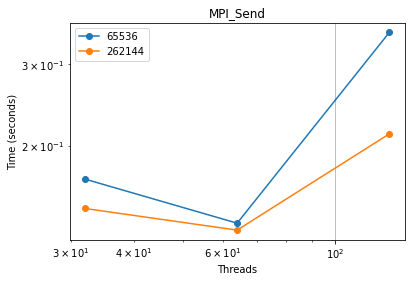

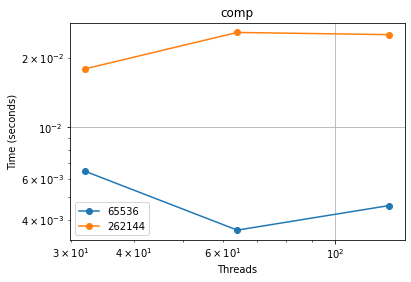

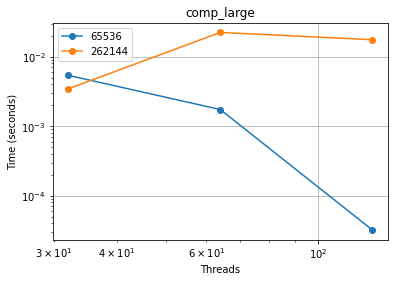

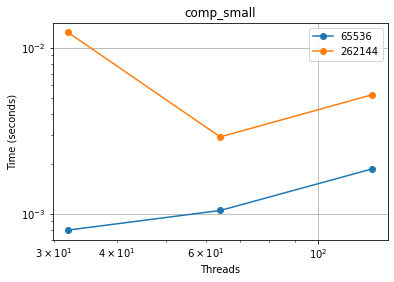

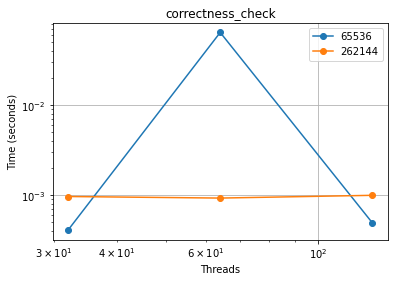

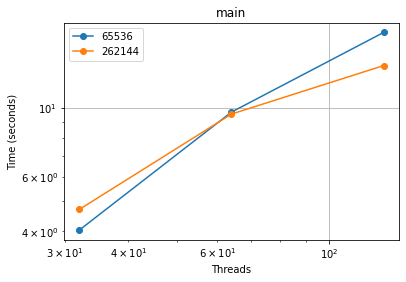

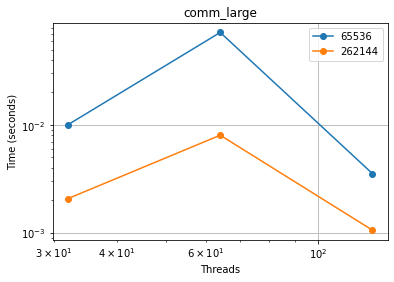

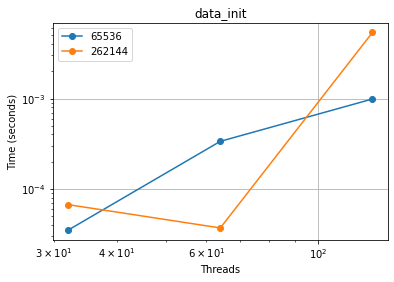

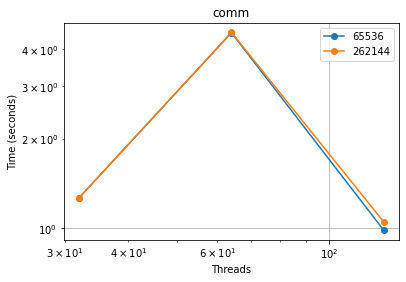

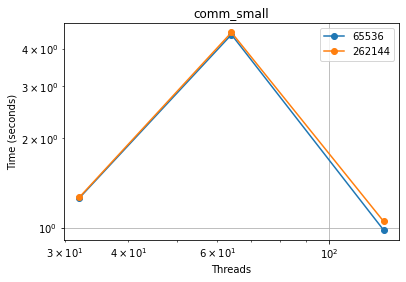

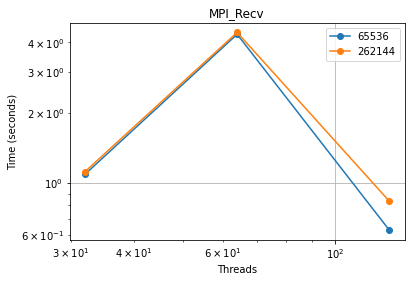

In [22]:
for name in function_names:
    plot_pandas(
        df=ctk.dataframe.loc[name],
        title=name,
        xlabel="Threads",
        ylabel="Time (seconds)",
        loglog=True
    )

In [24]:
for name in function_names:
    plot_mpl(
        df=ctk.dataframe.loc[name],
        title=name,
        xlabel="Threads",
        ylabel="Time (seconds)",
    )

NameError: name 'function_names' is not defined

## Speedup

In [26]:
ctk.dataframe

65536    262144   1048576    4194304  \
name              num_threads                                            
main              64           0.642092  0.712372  1.457336  12.077580   
                  128          0.610994  0.446238  1.190037  11.810903   
                  256          0.328821  0.709014  1.192982  12.101881   
                  512          0.338536  0.408878  1.109473  11.917889   
                  1024         0.332051  0.428586  1.415353  11.998971   
comm              64           0.005123  0.086054  0.840317  11.434738   
                  128          0.006536  0.047666  0.833091  11.396879   
                  256          0.006355  0.090427  0.834413  11.465029   
                  512          0.007210  0.077244  0.757204  11.481844   
                  1024         0.007678  0.094359  0.810835  11.339621   
comm_large        64           0.005046  0.086005  0.840266  11.434679   
                  128          0.006483  0.047610  0.833035  11.396828   
                  256          0.006301  0.090363  0.834356  11.464963   
                  512          0.007150  0.077186  0.757144  11.481782   
                  1024         0.007623  0.094303  0.810780  11.339571   
cudaMemcpy        64           0.004989  0.085965  0.840211  11.434611   
                  128          0.006451  0.047568  0.832987  11.396769   
                  256          0.006268  0.090317  0.834307  11.464908   
                  512          0.007115  0.077140  0.757094  11.481722   
                  1024         0.007592  0.094256  0.810719  11.339506   
comp              64           0.000240  0.000082  0.000085   0.000090   
                  128          0.000085  0.000090  0.000091   0.000086   
                  256          0.000092  0.000092  0.000093   0.000085   
                  512          0.000091  0.000100  0.000098   0.000099   
                  1024         0.000085  0.000091  0.000098   0.000084   
comp_large        64           0.000207  0.000068  0.000070   0.000073   
                  128          0.000071  0.000076  0.000077   0.000070   
                  256          0.000079  0.000076  0.000078   0.000070   
                  512          0.000077  0.000084  0.000081   0.000081   
                  1024         0.000072  0.000077  0.000080   0.000069   
correctness_check 64           0.000399  0.000701  0.002768   0.011002   
                  128          0.000181  0.000702  0.002768   0.011022   
                  256          0.000180  0.000701  0.002770   0.010953   
                  512          0.000179  0.000710  0.002736   0.010979   
                  1024         0.000179  0.000701  0.002762   0.011039   
data_init         64           0.001646  0.007009  0.024406   0.094006   
                  128          0.001505  0.006512  0.023380   0.097502   
                  256          0.001504  0.006797  0.023079   0.093628   
                  512          0.001496  0.005910  0.023202   0.093163   
                  1024         0.001493  0.005916  0.023420   0.093525   

                                 16777216     67108864  
name              num_threads                           
main              64           182.870666  2945.896275  
                  128          181.445471  2959.806924  
                  256          183.539106  2939.753842  
                  512          183.378530  2963.873032  
                  1024         182.136138  2915.969105  
comm              64           182.115315  2943.893475  
                  128          180.803069  2957.790251  
                  256          182.558967  2937.856818  
                  512          182.603219  2961.795000  
                  1024         181.387695  2913.976740  
comm_large        64           182.115258  2943.893416  
                  128          180.803013  2957.790192  
                  256          182.558912  2937.856757  
                  512          182.603159  2961.794925  
             

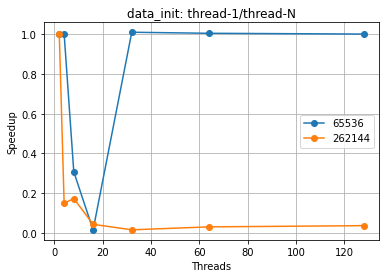

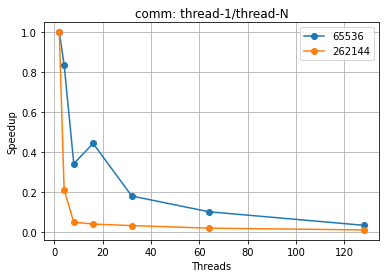

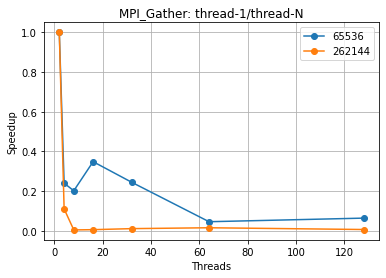

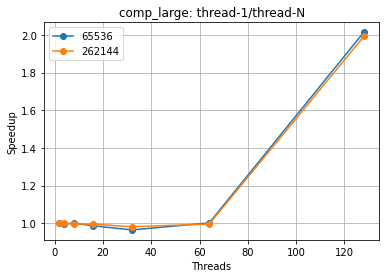

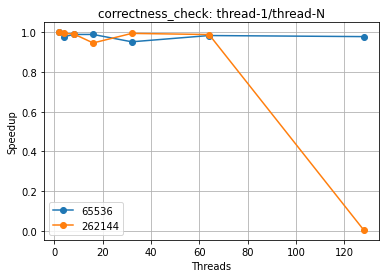

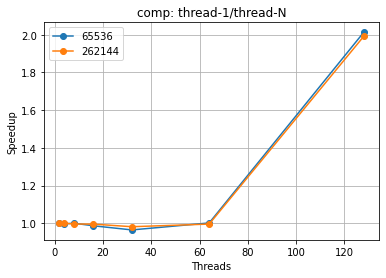

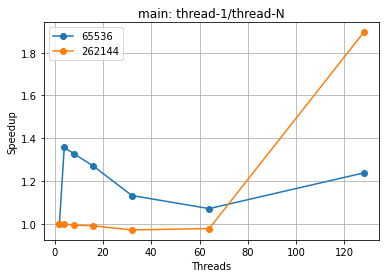

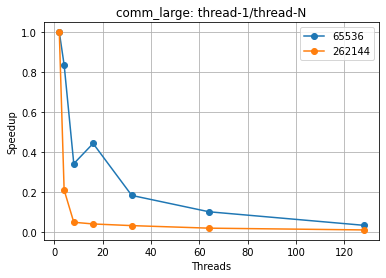

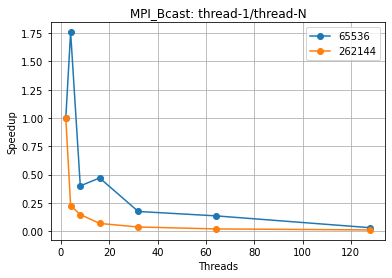

In [30]:
speedup_df = ctk.dataframe.loc[(slice(None),2), :].reset_index().drop("num_procs", axis=1).set_index("name")/ctk.dataframe

for name in function_names:
    plot_pandas(
        df=speedup_df.loc[name],
        title=f"{name}: thread-1/thread-N",
        xlabel="Threads",
        ylabel="Speedup",
        loglog=False
    )

In [27]:
ctk.dataframe.index

MultiIndex([(             'main',   64),
            (             'main',  128),
            (             'main',  256),
            (             'main',  512),
            (             'main', 1024),
            (             'comm',   64),
            (             'comm',  128),
            (             'comm',  256),
            (             'comm',  512),
            (             'comm', 1024),
            (       'comm_large',   64),
            (       'comm_large',  128),
            (       'comm_large',  256),
            (       'comm_large',  512),
            (       'comm_large', 1024),
            (       'cudaMemcpy',   64),
            (       'cudaMemcpy',  128),
            (       'cudaMemcpy',  256),
            (       'cudaMemcpy',  512),
            (       'cudaMemcpy', 1024),
            (             'comp',   64),
            (             'comp',  128),
            (             'comp',  256),
            (             'comp',  512),
            (   